In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
bolsafamilia2018 = pd.read_csv("https://github.com/mariabandeira/AdministracaoPublica/blob/main/BolsaFamilia/bolsafamilia-2018.csv?raw=true")

In [5]:
bolsafamilia2018

,ibge,anomes,qtd_familias_beneficiarias_bolsa_familia,valor_repassado_bolsa_familia
0,110001,201801,1594,248748.0
1,110002,201801,4149,584259.0
2,110003,201801,213,28617.0
3,110004,201801,2536,341439.0
4,110005,201801,682,100676.0
...,...,...,...,...
66835,522200,201812,356,53295.0
66836,522205,201812,861,136283.0
66837,522220,201812,587,93694.0
66838,522230,201812,584,84545.0


In [6]:
bolsafamilia2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ibge                                      66840 non-null  int64  
 1   anomes                                    66840 non-null  int64  
 2   qtd_familias_beneficiarias_bolsa_familia  66840 non-null  int64  
 3   valor_repassado_bolsa_familia             66840 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.0 MB


In [7]:
bolsafamilia2018.describe()

,ibge,anomes,qtd_familias_beneficiarias_bolsa_familia,valor_repassado_bolsa_familia
count,66840.000000,66840.000000,66840.000000,6.684000e+04
mean,325358.627828,201806.500000,2505.237313,4.581933e+05
std,98482.928985,3.452078,9583.379154,1.529420e+06
min,110001.000000,201801.000000,2.000000,1.710000e+02
25%,251210.000000,201803.750000,365.000000,5.919325e+04
50%,314627.500000,201806.500000,977.000000,1.740905e+05
75%,411920.000000,201809.250000,2475.000000,4.749175e+05
max,530010.000000,201812.000000,511168.000000,7.756090e+07


In [19]:
bolsafamilia2018_jp = bolsafamilia2018[bolsafamilia2018['ibge'] == 250750]
bolsafamilia2018_jp

,ibge,anomes,qtd_familias_beneficiarias_bolsa_familia,valor_repassado_bolsa_familia
1337,250750,201801,57110,9876733.0
6907,250750,201802,57788,9855138.0
12477,250750,201803,58194,9893690.0
18047,250750,201804,56213,9582152.0
23617,250750,201805,57483,9857779.0
29187,250750,201806,56475,9632191.0
34757,250750,201807,56889,10278826.0
40327,250750,201808,58238,10506451.0
45897,250750,201809,57438,10383728.0
51467,250750,201810,58262,10432768.0


In [21]:
bolsafamilia2018_angicos= bolsafamilia2018[bolsafamilia2018['ibge'] == 250400]
bolsafamilia2018_angicos

,ibge,anomes,qtd_familias_beneficiarias_bolsa_familia,valor_repassado_bolsa_familia
1293,250400,201801,26118,3416119.0
6863,250400,201802,26153,3396301.0
12433,250400,201803,26230,3391485.0
18003,250400,201804,25191,3260619.0
23573,250400,201805,25348,3278554.0
29143,250400,201806,24964,3237549.0
34713,250400,201807,25101,3416094.0
40283,250400,201808,25356,3444567.0
45853,250400,201809,24827,3393300.0
51423,250400,201810,25121,3436559.0


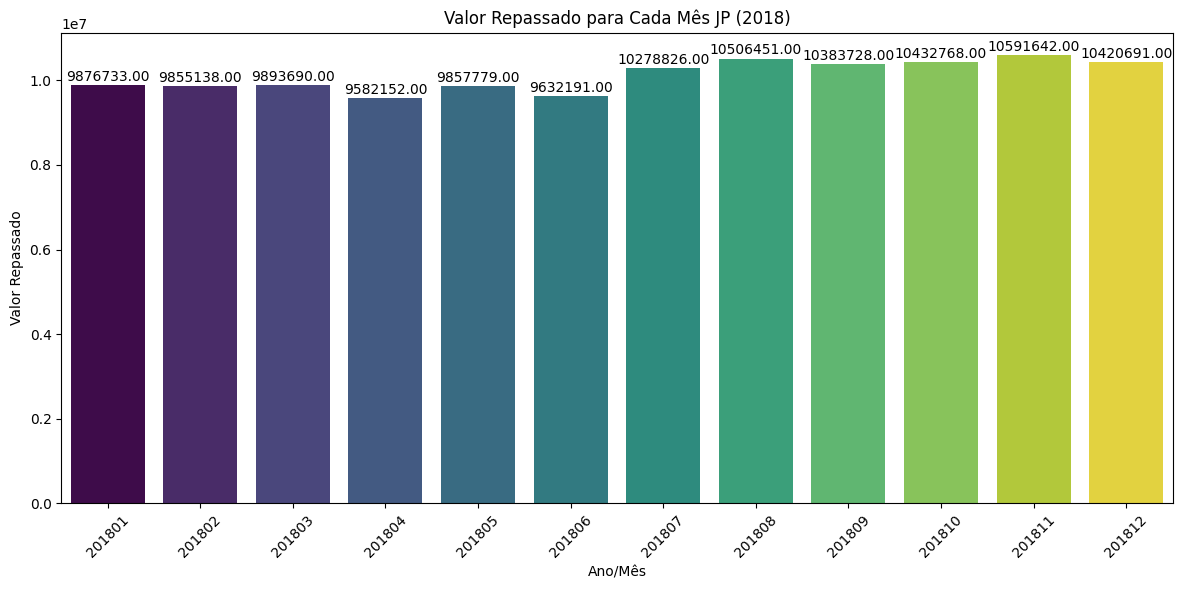

In [43]:
# Agrupar os dados por 'anomes' e somar os valores repassados
df_grouped = bolsafamilia2018_jp.groupby('anomes')['valor_repassado_bolsa_familia'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='anomes', y='valor_repassado_bolsa_familia', data=df_grouped, hue='anomes', legend=False, palette='viridis')

for index, row in df_grouped.iterrows():
    barplot.text(index, row['valor_repassado_bolsa_familia'] + 0.01 * row['valor_repassado_bolsa_familia'], 
                 f"{row['valor_repassado_bolsa_familia']:.2f}", color='black', ha="center")

# Adicionar títulos e rótulos
plt.title('Valor Repassado para Cada Mês JP (2018)')
plt.xlabel('Ano/Mês')
plt.ylabel('Valor Repassado')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

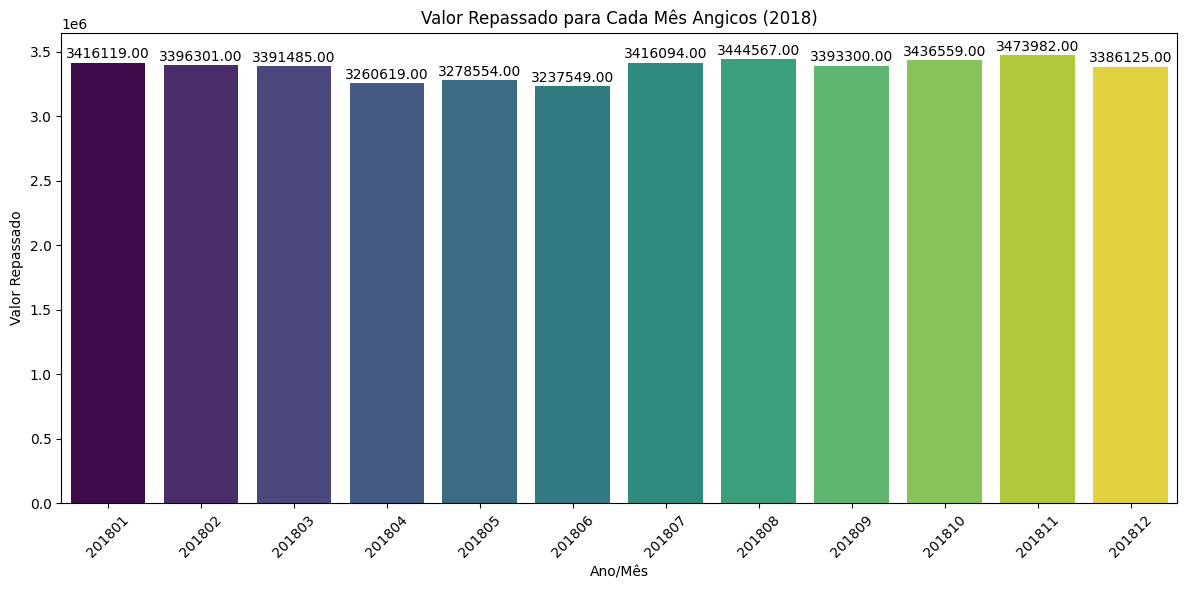

In [44]:
# Agrupar os dados por 'anomes' e somar os valores repassados
df_grouped = bolsafamilia2018_angicos.groupby('anomes')['valor_repassado_bolsa_familia'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='anomes', y='valor_repassado_bolsa_familia', data=df_grouped, hue='anomes', legend=False, palette='viridis')

for index, row in df_grouped.iterrows():
    barplot.text(index, row['valor_repassado_bolsa_familia'] + 0.01 * row['valor_repassado_bolsa_familia'], 
                 f"{row['valor_repassado_bolsa_familia']:.2f}", color='black', ha="center")

# Adicionar títulos e rótulos
plt.title('Valor Repassado para Cada Mês Angicos (2018)')
plt.xlabel('Ano/Mês')
plt.ylabel('Valor Repassado')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

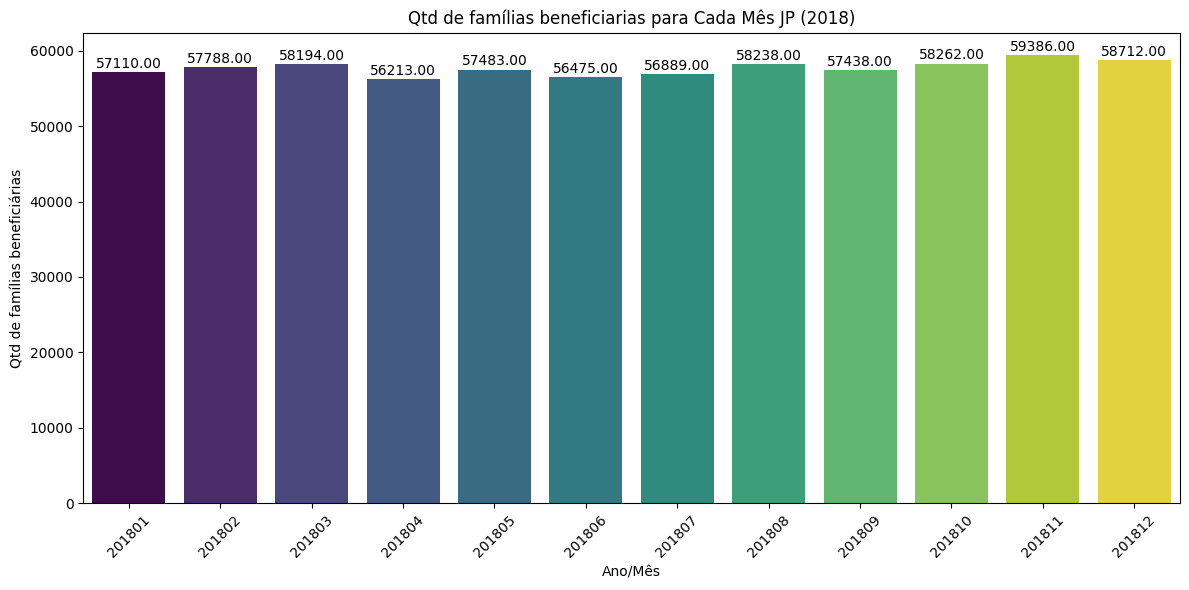

In [42]:
# Agrupar os dados por 'anomes' e somar os valores repassados
df_grouped = bolsafamilia2018_jp.groupby('anomes')['qtd_familias_beneficiarias_bolsa_familia'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='anomes', y='qtd_familias_beneficiarias_bolsa_familia', data=df_grouped, hue='anomes', legend=False, palette='viridis')

for index, row in df_grouped.iterrows():
    barplot.text(index, row['qtd_familias_beneficiarias_bolsa_familia'] + 0.01 * row['qtd_familias_beneficiarias_bolsa_familia'], 
                 f"{row['qtd_familias_beneficiarias_bolsa_familia']:.2f}", color='black', ha="center")

# Adicionar títulos e rótulos
plt.title('Qtd de famílias beneficiarias para Cada Mês JP (2018)')
plt.xlabel('Ano/Mês')
plt.ylabel('Qtd de famílias beneficiárias')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

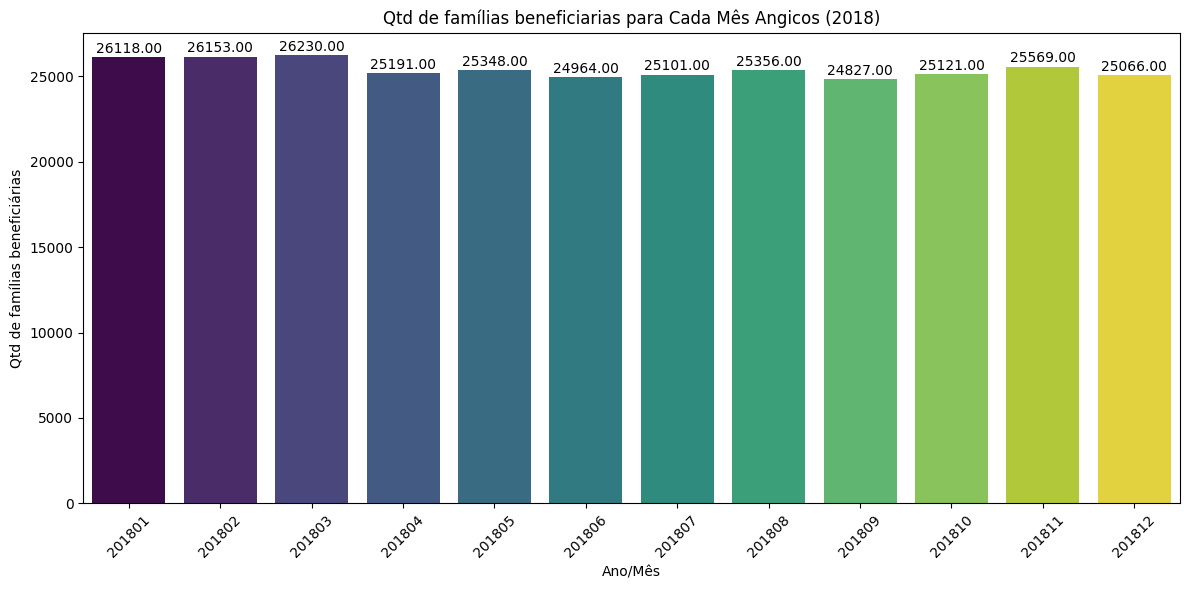

In [40]:
# Agrupar os dados por 'anomes' e somar os valores repassados
df_grouped = bolsafamilia2018_angicos.groupby('anomes')['qtd_familias_beneficiarias_bolsa_familia'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='anomes', y='qtd_familias_beneficiarias_bolsa_familia', data=df_grouped, hue='anomes', palette='viridis', legend=False)

for index, row in df_grouped.iterrows():
    barplot.text(index, row['qtd_familias_beneficiarias_bolsa_familia'] + 0.01 * row['qtd_familias_beneficiarias_bolsa_familia'], 
                 f"{row['qtd_familias_beneficiarias_bolsa_familia']:.2f}", color='black', ha="center")

# Adicionar títulos e rótulos
plt.title('Qtd de famílias beneficiarias para Cada Mês Angicos (2018)')
plt.xlabel('Ano/Mês')
plt.ylabel('Qtd de famílias beneficiárias')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()